In [175]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from zipfile import ZipFile
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
#file=r'/stacksample/stacksample.zip'

In [ ]:
# with ZipFile(file, 'r') as zip: 
#     # printing all the contents of the zip file 
#     zip.printdir() 
    
#     # extracting all the files 
#     print('Extracting all the files now...') 
#     zip.extractall() 
#     print('Done!') 

In [176]:
mcml_q= pd.read_csv(r"D:/Padmaja/EdvancerClass/DeepLearning/Project 1 Multiclass MultiLabel Prediction for Stack overflow/stacksample/Questions.csv",encoding='ISO-8859-1')
mcml_t=pd.read_csv(r"D:/Padmaja/EdvancerClass/DeepLearning/Project 1 Multiclass MultiLabel Prediction for Stack overflow/stacksample/Tags.csv",encoding='ISO-8859-1')

In [177]:
mcml_q.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [178]:
mcml_t.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [179]:
tags_10=mcml_t['Tag'].value_counts()[:10].index.tolist()

tags_10

['javascript',
 'java',
 'c#',
 'php',
 'android',
 'jquery',
 'python',
 'html',
 'c++',
 'ios']

In [180]:
mcml_t10 = mcml_t[mcml_t['Tag'].isin(tags_10)]

In [181]:
mcml_t10.count()

Id     826739
Tag    826739
dtype: int64

In [182]:
mcml_t10 = mcml_t10.groupby('Id',as_index=False)['Tag'].agg((lambda x: x.tolist()))

In [183]:
mcml_t10.head()

,Id,Tag
0,260,[c#]
1,330,[c++]
2,650,[c#]
3,930,[c#]
4,1010,[c#]


In [184]:
mcml_qt = pd.merge(mcml_q, mcml_t10, on='Id')

In [185]:
mcml_qt.iloc[6050:6060]


,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Tag
6050,877570,76393.0,2009-05-18T12:50:19Z,NaN,16,Java: Getting resolutions of one/all available...,"<p>I have two different-sized monitors, connec...",[java]
6051,877820,NaN,2009-05-18T13:46:48Z,NaN,1,CRSAPKCS1v15Encryptor class not found when com...,<p>I have written code in symbian c++ but i fa...,[c++]
6052,878010,243.0,2009-05-18T14:22:26Z,NaN,6,Programatically install Certificate Revocation...,<p>I need to download and install about 50 CRL...,[c#]
6053,878090,64106.0,2009-05-18T14:40:22Z,NaN,1,regular expression (javascript) How to match a...,<p>I'm trying to find all occurrences of items...,[javascript]
6054,878200,2828.0,2009-05-18T15:07:24Z,2013-08-13T13:53:19Z,17,Java curve fitting library,<p>I'm hoping to find a simple library that ca...,[java]
6055,878450,108876.0,2009-05-18T15:58:42Z,NaN,0,WMS authentication plugin,<p>I'm trying to create a custom authenticatio...,[c#]
6056,878650,56509.0,2009-05-18T16:47:52Z,NaN,51,Explanation of Func,<p>I was wondering if someone could explain wh...,[c#]
6057,878710,76682.0,2009-05-18T16:58:22Z,NaN,30,Is a Modal Confirm Box Using JQuery Possible?,"<p>Looked around quite a bit, and can't seem t...","[javascript, jquery]"
6058,878900,34806.0,2009-05-18T17:35:51Z,NaN,0,Hibernate for getting a list of primitive inte...,<p>Isn't there a way with Hibernate to return ...,[java]
6059,878960,20126.0,2009-05-18T17:47:33Z,NaN,3,Why put search input inside a form tag?,<p>I found that SO put the search input inside...,[html]


In [186]:
mcml_qt.tail()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Tag
706331,40143150,5496690.0,2016-10-19T23:31:41Z,NaN,0,"YouTube iFrame API: no ready call, no error call","<p>I'm trying to detect the ""flash out of date...",[javascript]
706332,40143190,333403.0,2016-10-19T23:36:01Z,NaN,1,How to execute multiline python code from a ba...,<p>I need to extend a shell script (bash). As ...,[python]
706333,40143210,5610777.0,2016-10-19T23:38:01Z,NaN,0,URL routing in PHP (MVC),<p>I am building a custom MVC project and I ha...,[php]
706334,40143340,7028647.0,2016-10-19T23:52:50Z,NaN,1,Obfuscating code in android studio,<p>Under minifyEnabled I changed from false to...,[android]
706335,40143360,871677.0,2016-10-19T23:55:24Z,NaN,0,How to fire function after v-model change?,<p>I have input which I use to filter my array...,[javascript]


### Tags Analysis:

In [187]:
mcml_qt['Tag'] = mcml_qt['Tag'].apply(lambda x: ','.join(map(str, x)))

In [188]:
mcml_qt.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Tag
0,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,c#
1,330,63.0,2008-08-02T02:51:36Z,NaN,29,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,c++
2,650,143.0,2008-08-03T11:12:52Z,NaN,79,Automatically update version number,<p>I would like the version property of my app...,c#
3,930,245.0,2008-08-04T00:47:25Z,NaN,28,How do I connect to a database and loop over a...,<p>What's the simplest way to connect and quer...,c#
4,1010,67.0,2008-08-04T03:59:42Z,NaN,14,"How to get the value of built, encoded ViewState?",<p>I need to grab the base64-encoded represent...,c#


In [189]:
# Total number of unique tags:

vector_tags = CountVectorizer(tokenizer = lambda x:x.split())
tag_dtm = vector_tags.fit_transform(mcml_qt['Tag'])

In [190]:
print("Number of unique tags are ", tag_dtm.shape[1])

Number of unique tags are  284


In [191]:
tag=vector_tags.get_feature_names()
print("Some of the Tags are: ",tag[:10])


Some of the Tags are:  ['android', 'android,c++', 'android,c++,ios', 'android,html', 'android,html,ios', 'android,ios', 'android,java', 'android,jquery', 'android,jquery,html', 'android,jquery,html,ios']


#### Number of times tag appeared:

In [192]:
freqs = tag_dtm.sum(axis=0).A1
result=dict(zip(tag,freqs))

In [193]:
result_count=pd.DataFrame(result.items(),columns=['Tag','Count'])

In [194]:
result_count.head()

,Tag,Count
0,android,70343
1,"android,c++",259
2,"android,c++,ios",15
3,"android,html",334
4,"android,html,ios",16


In [195]:
tag_df_sorted=result_count.sort_values(['Count'],ascending=False)
tag_counts=tag_df_sorted['Count'].values


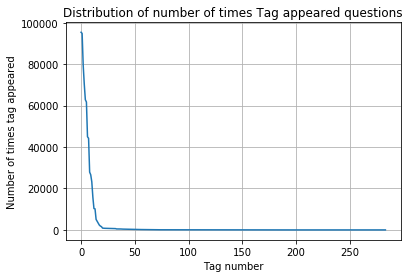

In [196]:
plt.plot(tag_counts)
plt.title("Distribution of number of times Tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

#### First 100 Tags distribution

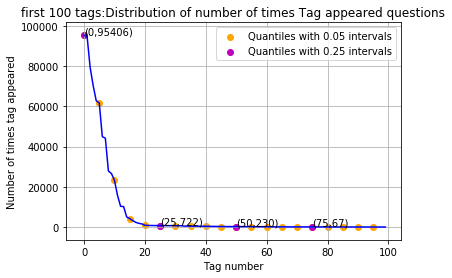

20 [95406 61719 23205  4181   877   722   668   450   370   260   230   196
   142   104    81    67    56    37    29    23]


In [197]:

plt.plot(tag_counts[0:100],c='b')
plt.scatter(x=list(range(0,100,5)),y=tag_counts[0:100:5], c='orange', label="Quantiles with 0.05 intervals")
# Quantiles with 0.25 Intervals
plt.scatter(x=list(range(0,100,25)),y=tag_counts[0:100:25], c='m', label="Quantiles with 0.25 intervals")

for x,y in zip(list(range(0,100,25)), tag_counts[0:100:25]):
    plt.annotate(s="({},{})".format(x,y),xy=(x,y), xytext=(x-0.05,y+500))
plt.title("first 100 tags:Distribution of number of times Tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()
print(len(tag_counts[0:100:5]),tag_counts[0:100:5])

#### Generating WordCloud:

In [ ]:
#!pip install wordcloud

In [198]:
import nltk
from wordcloud import WordCloud

In [199]:
all_tags=' '.join(result_count['Tag'])

(-0.5, 399.5, 199.5, -0.5)

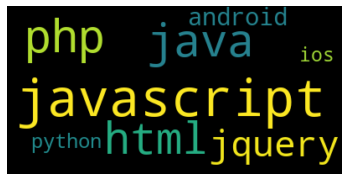

In [200]:
wordcloud = WordCloud().generate(all_tags)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#### Tags per question:

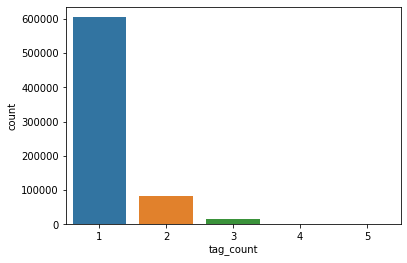

In [201]:
mcml_qt['tag_count']=mcml_qt['Tag'].apply(lambda x:len(x.split(',')))
sns.countplot(x=mcml_qt['tag_count'], data=mcml_qt)

In [202]:
import re


In [147]:
!pip install snowballstemmer

In [203]:
from nltk.stem import SnowballStemmer

In [221]:
def striphtml(data):
    pat=r"<.*?>"
    
    data['Question']=data['Question'].str.replace(pat,"")
    return

In [205]:
def preprocess(x):
    x=str(x).lower()
    x=x.replace("`","'").replace("won't","will not").replace("cannot","can not").replace("can't","can not").replace("n't"," not")\
                        .replace("what's","what is").replace("it's","it is").replace("'ve"," have").replace("i'm","i am").replace("'re"," are")\
                        .replace("he's","he is").replace("she's","she is").replace("'s"," own").replace("'ll"," will")
    
    stop = set(stopwords.words("english"))
    snow = SnowballStemmer("english")
    doc= " ".join(snow.stem(word) for word in x.split() if not word in stop and (len(word) !=1 or word == "c"))
    return doc
    

In [206]:
def cleanpunc(sentence):
    cleaned=re.sub(r'[?|!|\'|"]',r'',sentence)
    cleaned=re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return cleaned

In [207]:
def cleanlink(sentence):
    sent = re.sub(r'^https?:\/\/.*[\r\n]*','',sentence,flags=re.MULTILINE)
    return sent

In [208]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
lemma = WordNetLemmatizer()
my_stop=set(stopwords.words('english')+list(punctuation))

In [145]:
# def preprocess_all(message):
#     message=preprocess(message)
#     message=cleanpunc(message)
#     message=cleanlink(message)
#     message=striphtml(message)
    
#     return message

In [209]:
mcml_qt.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Tag,tag_count
0,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,c#,1
1,330,63.0,2008-08-02T02:51:36Z,NaN,29,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,c++,1
2,650,143.0,2008-08-03T11:12:52Z,NaN,79,Automatically update version number,<p>I would like the version property of my app...,c#,1
3,930,245.0,2008-08-04T00:47:25Z,NaN,28,How do I connect to a database and loop over a...,<p>What's the simplest way to connect and quer...,c#,1
4,1010,67.0,2008-08-04T03:59:42Z,NaN,14,"How to get the value of built, encoded ViewState?",<p>I need to grab the base64-encoded represent...,c#,1


In [210]:
mcml_qt["Question"] = mcml_qt[["Title", "Body"]].apply(lambda x: ' '.join(x), axis = 1) 

In [211]:
mcml_qt.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Tag,tag_count,Question
0,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,c#,1,Adding scripting functionality to .NET applica...
1,330,63.0,2008-08-02T02:51:36Z,NaN,29,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,c++,1,Should I use nested classes in this case? <p>I...
2,650,143.0,2008-08-03T11:12:52Z,NaN,79,Automatically update version number,<p>I would like the version property of my app...,c#,1,Automatically update version number <p>I would...
3,930,245.0,2008-08-04T00:47:25Z,NaN,28,How do I connect to a database and loop over a...,<p>What's the simplest way to connect and quer...,c#,1,How do I connect to a database and loop over a...
4,1010,67.0,2008-08-04T03:59:42Z,NaN,14,"How to get the value of built, encoded ViewState?",<p>I need to grab the base64-encoded represent...,c#,1,"How to get the value of built, encoded ViewSta..."


In [212]:
mcml_qt.drop(['OwnerUserId','CreationDate','ClosedDate','Score','Title','Body'],axis=1, inplace=True)

In [213]:
mcml_qt.head()

,Id,Tag,tag_count,Question
0,260,c#,1,Adding scripting functionality to .NET applica...
1,330,c++,1,Should I use nested classes in this case? <p>I...
2,650,c#,1,Automatically update version number <p>I would...
3,930,c#,1,How do I connect to a database and loop over a...
4,1010,c#,1,"How to get the value of built, encoded ViewSta..."


In [214]:
mcml_qt["Question"][0]

'Adding scripting functionality to .NET applications <p>I have a little game written in C#. It uses a database as back-end. It\'s \na <a href="http://en.wikipedia.org/wiki/Collectible_card_game">trading card game</a>, and I wanted to implement the function of the cards as a script.</p>\n\n<p>What I mean is that I essentially have an interface, <code>ICard</code>, which a card class implements (<code>public class Card056 : ICard</code>) and which contains function that are called by the game.</p>\n\n<p>Now, to make the thing maintainable/moddable, I would like to have the class for each card as source code in the database and essentially compile it on first use. So when I have to add/change a card, I\'ll just add it to the database and tell my application to refresh, without needing any assembly deployment (especially since we would be talking about 1 assembly per card which means hundreds of assemblies).</p>\n\n<p>Is that possible? Register a class from a source file and then instantia

In [215]:
mcml_qt["Question"]=mcml_qt["Question"].apply(preprocess)

In [216]:
mcml_qt.head()


,Id,Tag,tag_count,Question
0,260,c#,1,ad script function .net applic <p>i littl game...
1,330,c++,1,use nest class case? <p>i work collect class u...
2,650,c#,1,automat updat version number <p>i would like v...
3,930,c#,1,connect databas loop recordset c#? <p>what sim...
4,1010,c#,1,"get valu built, encod viewstate? <p>i need gra..."


In [217]:
mcml_qt["Question"]=mcml_qt["Question"].apply(cleanpunc)

In [218]:
mcml_qt["Question"].head()

0    ad script function  net applic <p>i littl game...
1    use nest class case <p>i work collect class us...
2    automat updat version number <p>i would like v...
3    connect databas loop recordset c# <p>what simp...
4    get valu built  encod viewstate <p>i need grab...
Name: Question, dtype: object

In [219]:
mcml_qt["Question"]=mcml_qt['Question'].apply(cleanlink)

In [220]:
mcml_qt.head()

,Id,Tag,tag_count,Question
0,260,c#,1,ad script function net applic <p>i littl game...
1,330,c++,1,use nest class case <p>i work collect class us...
2,650,c#,1,automat updat version number <p>i would like v...
3,930,c#,1,connect databas loop recordset c# <p>what simp...
4,1010,c#,1,get valu built encod viewstate <p>i need grab...


In [222]:
striphtml(mcml_qt)

In [224]:
mcml_qt.head(),mcml_qt["Question"][0]


(     Id  Tag  tag_count                                           Question
 0   260   c#          1  ad script function  net applic i littl game wr...
 1   330  c++          1  use nest class case i work collect class use v...
 2   650   c#          1  automat updat version number i would like vers...
 3   930   c#          1  connect databas loop recordset c# what simples...
 4  1010   c#          1  get valu built  encod viewstate i need grab ba...,
 'ad script function  net applic i littl game written c#  use databas back-end  trad card game  want implement function card script  what mean essenti interface  icard  card class implement  publ class card056 icard  contain function call game  now  make thing maintainable moddable  would like class card sourc code databas essenti compil first use  add chang card  add databas tell applic refresh  without need assembl deploy  especi sinc would talk assembl per card mean hundr assemblies   is possible regist class sourc file instanti it  e

In [228]:
qt=list(zip(mcml_qt['Question'],mcml_qt['Tag']))
mcml_final=pd.DataFrame(qt, columns=['Question','Tags'])

In [229]:
mcml_final.head()

,Question,Tags
0,ad script function net applic i littl game wr...,c#
1,use nest class case i work collect class use v...,c++
2,automat updat version number i would like vers...,c#
3,connect databas loop recordset c# what simples...,c#
4,get valu built encod viewstate i need grab ba...,c#


In [230]:
mcml_final.to_csv('mcml_final.csv')